## Pendahuluan

![](https://static1.squarespace.com/static/5daddb33ee92bf44231c2fef/t/5f0387d2f6724b5987a29311/1594066902743/natural%2Blanguage%2Bprocessing%2Bin%2Bhealthcare%2B-%2Bforesee%2Bmedical.gif?format=1500w)
![](https://miro.medium.com/proxy/1*_JW1JaMpK_fVGld8pd1_JQ.gif)


Analisis sentimen adalah proses untuk mengidentifikasi, mengekstrak, dan mengevaluasi opini, perasaan, atau sentimen yang terkandung dalam teks, seperti doc pelanggan, posting media sosial, artikel berita, atau teks lainnya. Tujuan utama dari analisis sentimen adalah untuk memahami apakah suatu teks mengandung sentimen positif, negatif, atau netral, serta sejauh mana sentimen tersebut diekspresikan. 

Terdapat beberapa metode untuk melakukan analisis sentimen, termasuk:
* Pendekatan berbasis aturan: Menggunakan aturan atau daftar kata kunci untuk menilai sentimen teks.
* Pendekatan berbasis statistik: Menggunakan teknik seperti analisis regresi logistik atau mesin pembelajaran untuk mengklasifikasikan teks.
* Pembelajaran Mendalam (Deep Learning): Memanfaatkan jaringan saraf tiruan (neural networks) untuk analisis sentimen yang lebih kompleks.

Data untuk analisis sentimen dapat diperoleh dari berbagai sumber, seperti doc pelanggan, media sosial, survei, atau wawancara. Setiap sumber data mungkin memiliki karakteristik dan tantangan tersendiri.

## Unsupervised Lexical Based Models

Unsupervised lexical models, dalam konteks analisis sentimen, adalah jenis model yang digunakan untuk mengidentifikasi dan menganalisis sentimen dalam teks tanpa memerlukan anotasi atau label sentimen pada data pelatihan. Model ini bergantung pada informasi leksikal atau fitur-fitur linguistik yang ditemukan dalam teks untuk menentukan sentimen positif, negatif, atau netral.

Model leksikon biasanya menggunakan leksikon, juga dikenal sebagai kamus atau kosa kata kata-kata yang secara khusus terkait dengan analisis sentimen. Leksikon ini berisi daftar kata-kata yang terkait dengan sentimen positif dan negatif, polaritas (besaran nilai negatif atau positif), part of speech (POS) tagging, pengklasifikasi subjektivitas (kuat, lemah, netral), suasana hati, dan sebagainya. Kita dapat menggunakan leksikon-leksikon ini dan menghitung sentimen dari dokumen teks dengan mencocokkan kehadiran kata-kata tertentu dari leksikon dan kemudian mempertimbangkan faktor-faktor lain seperti keberadaan parameter negasi, kata-kata sekitar, konteks keseluruhan, frasa, dan nilai polaritas sentimen keseluruhan agregat untuk menentukan nilai sentimen akhir.


Setiap kata dalam teks diberi bobot berdasarkan sejauh mana kata tersebut memiliki sentimen positif atau negatif menurut kamus sentimen. Bobot ini dapat diberikan dalam bentuk skor numerik.

Model unsupervised akan mencoba mendeteksi pola kata atau frasa yang mengindikasikan sentimen. Contohnya, jika dalam sebuah teks terdapat kata-kata positif seperti "baik", "senang", dan "puas", serta kata-kata negatif seperti "buruk" dan "kecewa", model akan mencoba untuk mengekstrak sentimen berdasarkan keseimbangan antara kata-kata ini.

Model akan menghitung skor sentimen keseluruhan berdasarkan pembobotan kata dan pola yang terdeteksi. Skor positif mengindikasikan sentimen positif, skor negatif mengindikasikan sentimen negatif, dan skor netral mengindikasikan ketiadaan sentimen.

Cara paling sederhana memanfaatkan lexicon adalah dengan menghitung kata positif dan negatif dalam suatu kalimat kemudian menampilkan angka 1 (positif),0(netral) atau -1(negatif)

$$
\text{StSc}(x) = \Bigg \{ \begin{matrix}  1 & 
\text{kata positif } > \text{negatif} \\ -1 & \text{kata positif } < \text{negatif} \\ 0 & \text{selainnya} \end{matrix}
$$

In [1]:
# Fungsi Load Lexicon
def loadLexicon(file):
    df=open(file,"r",encoding="utf-8", errors='replace')
    data=df.readlines();df.close()
    return [d.strip().lower() for d in data]

In [2]:
fpos = "/kaggle/input/kamus-sentimen/s-pos.txt"
fneg = "/kaggle/input/kamus-sentimen/s-neg.txt"
fnegasi = "/kaggle/input/kamus-sentimen/negasi.txt"

In [3]:
positif, negatif, negasi = loadLexicon(fpos), loadLexicon(fneg), loadLexicon(fnegasi)
print(positif[:10])
print(negatif[:10])
print(negasi[:10])

['a+', 'acungan jempol', 'adaptif', 'adil', 'afinitas', 'afirmasi', 'agilely', 'agung', 'ahli', 'ahlinya']
['abnormal', 'absurd', 'acak', 'acak-acakan', 'acuh', 'acuh tak acuh', 'adiktif', 'adil', 'agresi', 'agresif']
['belum', 'belum dapat', 'berhenti', 'bukan', 'dihentikan', 'diselesaikan', 'engga', 'enggak', 'ga', 'harusnya']


In [4]:
def prediksiSentiment(kalimat, positif, negatif, negasi):
    posWords = []
    negWords = [w for w in negatif if w in kalimat]
    for w in positif:
        if w in kalimat:
            negated = False
            for n in negasi:
                if n+' '+w in kalimat:
                    negWords.append(n+' '+w)
                    negated = True
                    break
            if not negated:
                posWords.append(w)
    nPos, nNeg = len(posWords), len(negWords)
    if nPos>nNeg:
        return 1
    if nPos<nNeg:
        return -1
    else:
        return 0

In [5]:
Teks = "mie ayam ini enak"
prediksiSentiment(Teks, positif, negatif, negasi)

1

In [6]:
Teks = "dia tidak hadir di pelatihan"
prediksiSentiment(Teks, positif, negatif, negasi)

-1

Namun metode ini tidak bisa mendeteksi pernyataan seperti ini

In [7]:
Teks = "Ujiannya sangat sulit, aku tidak bisa mengerjakannya. Tapi bohong. Berchandyaaa"
prediksiSentiment(Teks, positif, negatif, negasi)

-1

## IndoBERT

IndoBERT adalah model bahasa yang diadaptasi khusus untuk bahasa Indonesia. Ini merupakan versi dari BERT (Bidirectional Encoder Representations from Transformers) yang telah dilatih untuk memahami teks dalam bahasa Indonesia. Model ini sangat berguna dalam tugas analitik teks seperti pemahaman teks, pengklasifikasian sentimen, dan pemodelan bahasa, karena dapat menghasilkan representasi vektor teks yang kaya dan kontekstual.

BERT adalah sebuah model bahasa yang revolusioner dalam pemrosesan bahasa alami (NLP). Model ini dikembangkan oleh Google AI pada tahun 2018. Berikut adalah beberapa poin kunci tentang BERT:

* Model Bahasa: BERT adalah model bahasa yang mendalam berbasis transformer. Ini memiliki kemampuan untuk memahami konteks dan hubungan antara kata dalam teks dengan cara yang lebih baik daripada model sebelumnya.

* Bidireksional: BERT memproses teks secara simultan dari kedua arah (disebut "bidireksional"), yang berarti ia dapat memahami kata-kata dalam konteks lengkap mereka dalam kalimat, bukan hanya dari kiri ke kanan atau sebaliknya. Ini memberikan pemahaman yang lebih baik tentang arti sebenarnya dari kata-kata dalam suatu konteks.

* Pre-trained dan Fine-tuning: BERT dilatih terlebih dahulu pada korpus teks yang sangat besar, sehingga modelnya memahami banyak aspek bahasa. Kemudian, model BERT ini dapat di-tune ulang untuk tugas-tugas NLP tertentu, seperti pengklasifikasian teks, pemahaman teks, atau tugas-tugas terkait bahasa lainnya.

* State-of-the-Art: Ketika BERT pertama kali diperkenalkan, itu mencapai hasil yang sangat baik dalam berbagai tugas pemrosesan bahasa alami dan sejak itu menjadi dasar bagi banyak perkembangan terbaru dalam NLP. Model-model berbasis BERT telah menjadi standar de facto untuk tugas-tugas NLP.

* Open Source: Google merilis BERT sebagai perangkat sumber terbuka sehingga peneliti dan pengembang di seluruh dunia dapat menggunakannya dan melakukan fine-tuning sesuai dengan kebutuhan mereka.

## Implementation of Indobert

Latihan kali ini akan melakukan analisis sentimen review pengguna aplikasi PLN Mobile. Referensi syntax milik [YosefOwenM-0905](https://github.com/YosefOwenM-0905/Implementation-Of-Indobert-On-UserReviewsOfThePlnMobile-Application-BasedOnIndonesianLanguageLexicon), digunakan untuk pembelajaran.

In [8]:
import pandas as pd
import numpy as np
review = pd.read_csv('/kaggle/input/pln-mobile/review-pln-mobile.csv', sep=",")
review

,Unnamed: 0,rating,waktu,ulasan
0,1,5,2022-06-23 15:33:45,"Sangat membantu,urusan jadi lebih mudah. Namun..."
1,2,1,2022-06-23 15:00:18,Udah pengajuan menambah speed iconnet dari 10m...
2,3,1,2022-06-23 14:59:38,Aplikasi membingungkan. Bagaimana pelanggan ak...
3,4,1,2022-06-23 14:43:33,Kan sy mau pasang iconnet nih terus tdi teknis...
4,5,5,2022-06-23 14:17:21,"Kenapa pln mobil blum bisa top up saldo,kog ma..."
...,...,...,...,...
995,996,5,2022-01-09 21:30:50,Mengapa fitur data pembayaran yg sdh dilakukan...
996,997,5,2022-01-09 20:51:30,"Sesuai motonya ""semua makin mudah"", Laporan Ga..."
997,998,4,2022-01-05 18:15:50,"Say kasih bintang 4 dulu,saya sangat kesulitan..."
998,999,2,2022-01-03 14:02:40,"Untuk menu penyambungan baru, ketika menentuka..."


### Text Pre-processing

In [9]:
pip install nlp-id

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 12.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 41.4 MB/s eta 0:00:00:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 18.6 MB/s eta 0:00:00
  Created wheel for nlp-id: filename=nlp_id-0.1.15.0-py3-none-any.whl size=58153894 sha256=9e2f15b88499fd0766f23a8b7bd9ccbc21d8a6c33e3977c7b625cd9750a91386
  Stored in directory: /root/.cache/pip/wheels/85/34/2a/deaf7b7896a1eed336b874e1a7732588d40bb7bdc0a824e73e
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=0251b8cd5310d9fc8cfc955b9c9aadc986a50779e4ce0ffdadf89bcf727e2adc
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built nlp-id wget
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfu

In [10]:
import pandas as pd
import string
import re
import json
from nlp_id.tokenizer import Tokenizer
from nlp_id.stopword import StopWord 
from nlp_id.lemmatizer import Lemmatizer 

In [11]:
#import kamus bahasa baku
with open('/kaggle/input/nlp-bahasa-resources/combined_slang_words.txt') as f:
    data0 = f.read()
print("Data type before reconstruction : ", type(data0))
formal_indo = json.loads(data0)
print("Data type after reconstruction : ", type(formal_indo))

Data type before reconstruction :  <class 'str'>
Data type after reconstruction :  <class 'dict'>


In [12]:
def informal_to_formal_indo(text):
    res = " ".join(formal_indo.get(ele, ele) for ele in text.split())
    return(res)

In [13]:
tokenizer = Tokenizer() 
stopword = StopWord() 
lemmatizer = Lemmatizer()

In [14]:
def my_tokenizer(doc):
    doc = re.sub(r'@[A-Za-z0-9]+', '', doc)
    doc = re.sub(r'#[A-Za-z0-9]+', '', doc)
    doc = re.sub(r'RT[\s]', '', doc)
    doc = re.sub(r"http\S+", '', doc)
    doc = re.sub(r'[0-9]+', '', doc)
    doc = re.sub(r'(.)\1+',r'\1\1', doc)
    doc = re.sub(r'[\?\.\!]+(?=[\?.\!])', '',doc)
    doc = re.sub(r'[^a-zA-Z]',' ', doc)
    doc = re.sub(r'\b(\w+)( \1\b)+', r'\1', doc)
    doc = doc.replace('\n', ' ')
    doc = doc.translate(str.maketrans('', '', string.punctuation))
    doc = doc.strip(' ')   
    #Mengubah menjadi huruf kecil
    doc = doc.lower()    
    #Text Normalization
    doc = informal_to_formal_indo(doc)    
    #Punctuation Removal+Menghapus Angka
    doc = doc.translate(str.maketrans('', '', string.punctuation + string.digits))   
    #Whitespace Removal
    doc = doc.strip()
    #Tokenization
    doc = tokenizer.tokenize(doc)
    doc_token1 = [word for word in doc]
    #Stopwords Removal
    doc_token2 = [word for word in doc_token1 if word not in stopword.get_stopword()]   
    #Lemmatization
    doc_token3 = [lemmatizer.lemmatize(word) for word in doc_token2]    
    return doc_token3

In [15]:
#text  pre-processing
review['preprocessing'] = review['ulasan'].apply(my_tokenizer)
review[['ulasan', 'preprocessing']]

,ulasan,preprocessing
0,"Sangat membantu,urusan jadi lebih mudah. Namun...","[bantu, urus, mudah, buka, aplikasi, berat, mu..."
1,Udah pengajuan menambah speed iconnet dari 10m...,"[aju, tambah, speed, iconnet, mbps, mbps, nnti..."
2,Aplikasi membingungkan. Bagaimana pelanggan ak...,"[aplikasi, bingung, langgan, paham, slo, nidi,..."
3,Kan sy mau pasang iconnet nih terus tdi teknis...,"[pasang, iconnet, teknisi, sdh, dtng, pasang, ..."
4,"Kenapa pln mobil blum bisa top up saldo,kog ma...","[pln, mobil, top, up, saldo, lwat, accont, ban..."
...,...,...
995,Mengapa fitur data pembayaran yg sdh dilakukan...,"[fitur, data, bayar, sdh, banding, versi, munc..."
996,"Sesuai motonya ""semua makin mudah"", Laporan Ga...","[sesuai, moto, mudah, lapor, ganggu, keluh, li..."
997,"Say kasih bintang 4 dulu,saya sangat kesulitan...","[say, kasih, bintang, sulit, masuk, fitur, uba..."
998,"Untuk menu penyambungan baru, ketika menentuka...","[menu, sambung, tentu, titik, lokasi, terang, ..."


In [16]:
review1=review[['ulasan', 'preprocessing']]

In [17]:
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def stemming(ulasan) :
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in ulasan:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  return d_clean

review['stemming_ulasan'] = review['preprocessing'].apply(stemming)
review[['stemming_ulasan']]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.8 MB/s eta 0:00:00


,stemming_ulasan
0,bantu urus mudah buka aplikasi berat muter tha...
1,aju tambah speed iconnet mbps mbps nnti info g...
2,aplikasi bingung langgan paham slo nidi jelas ...
3,pasang iconnet teknisi sdh dtng pasang sedia t...
4,pln mobil top up saldo lwat accont bank biaya ...
...,...
995,fitur data bayar sdh banding versi muncul fitu...
996,sesuai moto mudah lapor ganggu keluh listrik m...
997,say kasih bintang sulit masuk fitur ubah daya ...
998,menu sambung tentu titik lokasi terang jalan n...


### Labeling with Inset Lexicon

In [18]:
lexicon_positive = pd.read_excel('/kaggle/input/kamus-sentimen/kamus_positif.xlsx')
lexicon_positive_dict = {}
for index, row in lexicon_positive.iterrows():
    if row[0] not in lexicon_positive_dict:
        lexicon_positive_dict[row[0]] = row[1]

lexicon_negative = pd.read_excel('/kaggle/input/kamus-sentimen/kamus_negatif.xlsx')
lexicon_negative_dict = {}
for index, row in lexicon_negative.iterrows():
    if row[0] not in lexicon_negative_dict:
        lexicon_negative_dict[row[0]] = row[1]

def sentiment_analysis_lexicon_indonesia(ulasan):
    score = 0
    for word in ulasan:
        if (word in lexicon_positive_dict):
            score = score + lexicon_positive_dict[word]
    for word in ulasan:
        if (word in lexicon_negative_dict):
            score = score + lexicon_negative_dict[word]
    sentimen=''
    if (score > 0):
        sentimen = 'positif'
    elif (score < 0):
        sentimen = 'negatif'
    else:
        sentimen = 'netral'
    return score, sentimen

results = review['preprocessing'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
review['label'] = results[0]
#data['sentimen'] = results[1]
#data

review['label'] = results[1]
dataSentimen = review
data_inset = review

data_inset[['ulasan', 'preprocessing', 'label']]

,ulasan,preprocessing,label
0,"Sangat membantu,urusan jadi lebih mudah. Namun...","[bantu, urus, mudah, buka, aplikasi, berat, mu...",positif
1,Udah pengajuan menambah speed iconnet dari 10m...,"[aju, tambah, speed, iconnet, mbps, mbps, nnti...",netral
2,Aplikasi membingungkan. Bagaimana pelanggan ak...,"[aplikasi, bingung, langgan, paham, slo, nidi,...",netral
3,Kan sy mau pasang iconnet nih terus tdi teknis...,"[pasang, iconnet, teknisi, sdh, dtng, pasang, ...",netral
4,"Kenapa pln mobil blum bisa top up saldo,kog ma...","[pln, mobil, top, up, saldo, lwat, accont, ban...",positif
...,...,...,...
995,Mengapa fitur data pembayaran yg sdh dilakukan...,"[fitur, data, bayar, sdh, banding, versi, munc...",netral
996,"Sesuai motonya ""semua makin mudah"", Laporan Ga...","[sesuai, moto, mudah, lapor, ganggu, keluh, li...",positif
997,"Say kasih bintang 4 dulu,saya sangat kesulitan...","[say, kasih, bintang, sulit, masuk, fitur, uba...",negatif
998,"Untuk menu penyambungan baru, ketika menentuka...","[menu, sambung, tentu, titik, lokasi, terang, ...",positif


In [19]:
data = review[['stemming_ulasan', 'label']]
data

,stemming_ulasan,label
0,bantu urus mudah buka aplikasi berat muter tha...,positif
1,aju tambah speed iconnet mbps mbps nnti info g...,netral
2,aplikasi bingung langgan paham slo nidi jelas ...,netral
3,pasang iconnet teknisi sdh dtng pasang sedia t...,netral
4,pln mobil top up saldo lwat accont bank biaya ...,positif
...,...,...
995,fitur data bayar sdh banding versi muncul fitu...,netral
996,sesuai moto mudah lapor ganggu keluh listrik m...,positif
997,say kasih bintang sulit masuk fitur ubah daya ...,negatif
998,menu sambung tentu titik lokasi terang jalan n...,positif


In [20]:
data['label'].value_counts()

label
positif    506
netral     328
negatif    166
Name: count, dtype: int64

<Axes: ylabel='count'>

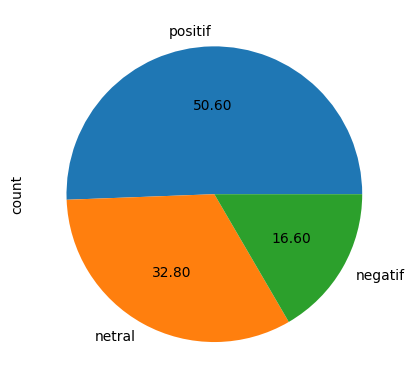

In [21]:
data['label'].value_counts().plot.pie(autopct='%.2f')

In [22]:
data.replace(to_replace='negatif', value=0, inplace=True)
data.replace(to_replace='positif', value=1, inplace=True)
data.replace(to_replace='netral', value=2, inplace=True)
data.head()

/tmp/ipykernel_32/2086701903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(to_replace='negatif', value=0, inplace=True)
/tmp/ipykernel_32/2086701903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(to_replace='positif', value=1, inplace=True)
/tmp/ipykernel_32/2086701903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(to_replace='netral', value=2, inplace=True)


,stemming_ulasan,label
0,bantu urus mudah buka aplikasi berat muter tha...,1
1,aju tambah speed iconnet mbps mbps nnti info g...,2
2,aplikasi bingung langgan paham slo nidi jelas ...,2
3,pasang iconnet teknisi sdh dtng pasang sedia t...,2
4,pln mobil top up saldo lwat accont bank biaya ...,1


### Split Data

In [23]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, test_size=0.2)
df_val, df_test = train_test_split(df_test, test_size=0.5)
df_train.shape, df_test.shape, df_val.shape
print('Training data shape:', df_train.shape)
print('Validation data shape:', df_val.shape)
print('Test data shape:', df_test.shape)

Training data shape: (800, 2)
Validation data shape: (100, 2)
Test data shape: (100, 2)


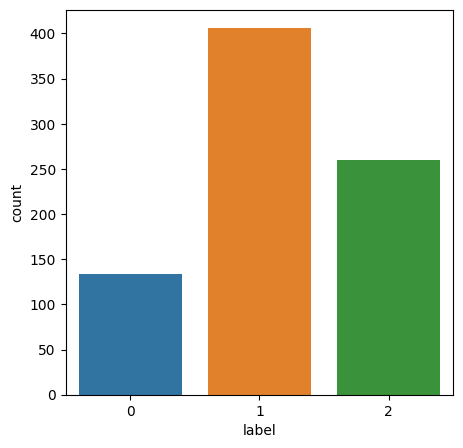

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.countplot(x=df_train['label'])
plt.show()

In [25]:
df_train.to_csv('data_training.csv', index = False)

In [26]:
data = pd.read_csv('data_training.csv')
data.head()

,stemming_ulasan,label
0,aplikasi pln mobile kes fiturnya lengkap bantu...,1
1,pln mobile mudah pasang meter daya cek tagih l...,1
2,canggih lengkap bayar rekening listrik pascaba...,1
3,halo kak mohon bantu bayar tagih listrik gagal...,0
4,aju listrik buat nidi slo ujang gatrik nidi ta...,1


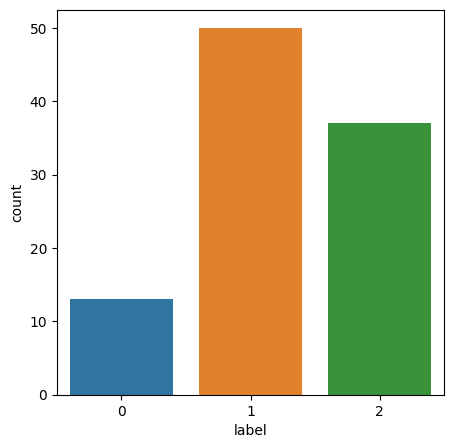

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.countplot(x=df_val['label'])
plt.show()

In [28]:
df_val.to_csv('data_validasi.csv', index = False)

In [29]:
data = pd.read_csv('data_validasi.csv')
data.head()

,stemming_ulasan,label
0,aplikasi gak udh daftar iconet udh gak instala...,2
1,bayar hasil nomor token transaksi proses,2
2,lapor keluh ganggu daya pasang praktis bebas p...,1
3,adu pakai aplikasi heran kasih rating engga ka...,0
4,mohon maaf menu live chat eror tik tunggu antr...,2


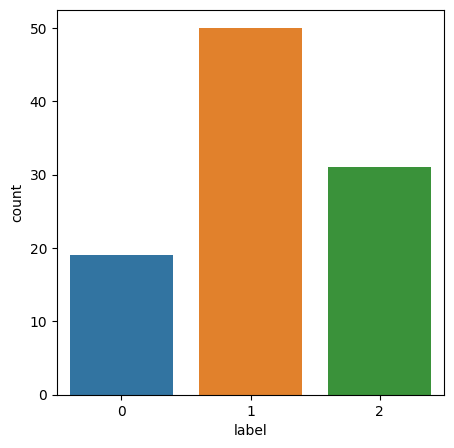

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.countplot(x=df_test['label'])
plt.show()

In [31]:
df_test.to_csv('data_testing.csv', index = False)

In [32]:
data = pd.read_csv('data_testing.csv')
data.head()

,stemming_ulasan,label
0,bantu lapor ganggu proses pasang mohon daya mu...,2
1,ambil foto kendala tulis periksa home mohon ba...,2
2,beli token input kode token meter teliti sesua...,2
3,mantap aplikasi pln mobile sistem adu pln mudah,1
4,apk pln mobile tingkat performance terima kasi...,1


### Indobert Model

In [33]:
#Modelling
!pip install transformers

In [34]:
from transformers import BertTokenizer

# Load tokenizer dari pre-trained model
bert_tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p2')

In [35]:
# View vocabulary from pre-trained models that have been preloaded
vocabulary = bert_tokenizer.get_vocab()
print('Panjang vocabulary:', len(vocabulary))

Panjang vocabulary: 30521


In [36]:
print(vocabulary)

{'[PAD]': 0, '[UNK]': 1, '[CLS]': 2, '[SEP]': 3, '[MASK]': 4, '##an': 5, 'd': 6, '##er': 7, 'm': 8, '##en': 9, 's': 10, 'p': 11, '##ar': 12, 'b': 13, 'k': 14, '##at': 15, '##ang': 16, '##in': 17, 't': 18, '##ak': 19, '##al': 20, '##ah': 21, '##as': 22, '##un': 23, '##am': 24, '##em': 25, 'di': 26, '##ya': 27, '##el': 28, '##ad': 29, '##eng': 30, 'y': 31, '##kan': 32, '##tu': 33, 'yang': 34, 'se': 35, '##ap': 36, '##is': 37, 'l': 38, '##ik': 39, 'h': 40, 'dan': 41, 'j': 42, 'ke': 43, '##il': 44, 'men': 45, '##on': 46, '##it': 47, 'in': 48, 'ber': 49, '##us': 50, '##ga': 51, '##or': 52, '##es': 53, 'ter': 54, '##ing': 55, 'r': 56, '##nya': 57, '##ur': 58, '##akan': 59, 'mem': 60, 'c': 61, 'per': 62, '##ut': 63, '##id': 64, '##ari': 65, '##ul': 66, '##um': 67, 'n': 68, '##ada': 69, '##uk': 70, '##ek': 71, '##ir': 72, '##ol': 73, '##ih': 74, '##engan': 75, '##ung': 76, '##eb': 77, 'un': 78, 'dengan': 79, 'meng': 80, '##tuk': 81, '##ag': 82, 'g': 83, '##et': 84, '##ara': 85, '##and': 86, '#

In [37]:
# Example of Tokenization
# Retrieve the 1st index data on the dataframe
print('Kalimat:', review['stemming_ulasan'][0])
print('BERT Tokenizer:', bert_tokenizer.tokenize(review['stemming_ulasan'][0]))

Kalimat: bantu urus mudah buka aplikasi berat muter thank salam sukses
BERT Tokenizer: ['bantu', 'urus', 'mudah', 'buka', 'aplikasi', 'berat', 'muter', 'thank', 'salam', 'sukses']


In [38]:
# Example of input formatting for BERT.
# Input formatting can use 'encode_plus' function
bert_input = bert_tokenizer.encode_plus(
    # Sample sentences
    review['stemming_ulasan'][0],
    # Add [CLS] token at the beginning of the sentence & [SEP] token at the end of the sentence
    add_special_tokens = True,
    # Add padding to max_length using [PAD] token
    # jika kalimat kurang dari max_length
    padding = 'max_length',
    # Truncate if sentence is more than max_length
    truncation = 'longest_first',
    # Determine the max_length of the entire sentence
    max_length = 50,
    # Returns the attention mask value
    return_attention_mask = True,
    # Returns the value of token type id (segment embedding)
    return_token_type_ids =True)
# The function 'encode_plus' returns 3 values:
# input_ids, token_type_ids, attention_mask
bert_input.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [39]:
# Original data
print('Kalimat\t\t:', review['stemming_ulasan'][0]) #1 denotes first order data or first review data
                                                   # so for example I change it to 1000 still 1 data appears but the order is 1000th
# Input formatting + tokenizer return
print('Tokenizer\t:', bert_tokenizer.convert_ids_to_tokens(bert_input['input_ids']))
# Input IDs: token indexes in the tokenizer vocabulary
print('Input IDs\t:', bert_input['input_ids'])
# Token type IDs: shows the sequence of sentences in the sequence (segment embedding)
print('Token Type IDs\t:', bert_input['token_type_ids'])
# Attention mask : returns value [0,1].
#1 means masked token, 0 tokens are not masked (ignored)
print('Attention Mask\t:', bert_input['attention_mask'])

Kalimat		: bantu urus mudah buka aplikasi berat muter thank salam sukses
Tokenizer	: ['[CLS]', 'bantu', 'urus', 'mudah', 'buka', 'aplikasi', 'berat', 'muter', 'thank', 'salam', 'sukses', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Input IDs	: [2, 1621, 16282, 783, 3121, 1339, 1396, 25589, 16627, 3595, 2152, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Token Type IDs	: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Attention Mask	: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

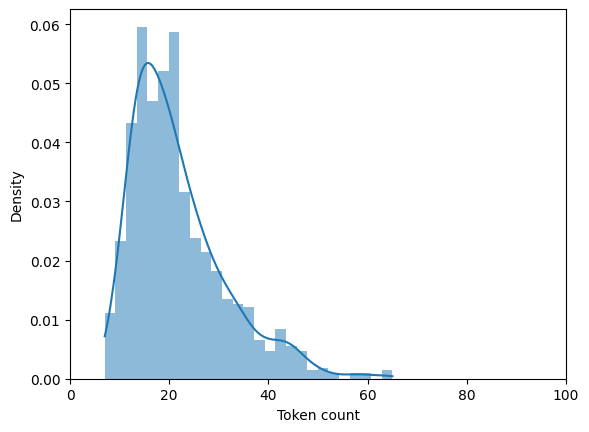

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
# There are many ways to define max_length
# The intuition is that we don't want to cut sentences
# Or added too much padding (longer computation)

# In this example, max_length is determined from the distribution of tokens in the dataset
token_lens = []
for txt in review['stemming_ulasan']:
  tokens = bert_tokenizer.encode(txt)
  token_lens.append(len(tokens))
sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 100]);
plt.xlabel('Token count');

In [41]:
# Create a function to combine tokenization steps
# Added special tokens for all data as input formatting to the BERT model
def convert_example_to_feature(sentence):
  return bert_tokenizer.encode_plus(
      sentence,
      add_special_tokens=True,
      padding='max_length',
      truncation='longest_first',
      max_length=42,
      return_attention_mask=True,
      return_token_type_ids=True)

In [42]:
# Create a function to map input formatting results to match the BERT model
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,               # Sebagai token embedding
      "token_type_ids": token_type_ids,     # Sebagai segment embedding
      "attention_mask": attention_masks,    # Sebagai filter informasi mana yang kalkulasi oleh model
  }, label

In [43]:
import tensorflow as tf
# Create a function to iterate or encode each sentence in the entire data
def encode(data):
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []

  for sentence, label in data.to_numpy():
    bert_input = convert_example_to_feature(sentence)
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])
  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

In [44]:
# Perform input formatting using the previous function on the data as a whole
train_encoded = encode(df_train).batch(32)
test_encoded = encode(df_test).batch(32)
val_encoded = encode(df_val).batch(32)

In [45]:
from transformers import TFBertForSequenceClassification

# Load model
bert_model = TFBertForSequenceClassification.from_pretrained(
    'indobenchmark/indobert-base-p2', num_labels=3)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [46]:
# Compile model
bert_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00003),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.keras.metrics.SparseCategoricalAccuracy('accuracy'))

In [47]:
%%time
bert_history = bert_model.fit(train_encoded, epochs=5,
                              batch_size=32, validation_data=val_encoded)

Epoch 1/5
25/25 [==============================] - 260s 9s/step - loss: 0.9464 - accuracy: 0.5300 - val_loss: 0.6947 - val_accuracy: 0.7100
Epoch 2/5
25/25 [==============================] - 204s 8s/step - loss: 0.5877 - accuracy: 0.7513 - val_loss: 0.4778 - val_accuracy: 0.8200
Epoch 3/5
25/25 [==============================] - 205s 8s/step - loss: 0.2556 - accuracy: 0.9112 - val_loss: 0.4821 - val_accuracy: 0.8400
Epoch 4/5
25/25 [==============================] - 204s 8s/step - loss: 0.1082 - accuracy: 0.9625 - val_loss: 0.8342 - val_accuracy: 0.7500
Epoch 5/5
25/25 [==============================] - 204s 8s/step - loss: 0.1625 - accuracy: 0.9438 - val_loss: 0.5294 - val_accuracy: 0.8400
CPU times: user 1h 57s, sys: 3min 19s, total: 1h 4min 17s
Wall time: 19min 34s


In [48]:
# Create a function for plotting training results
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

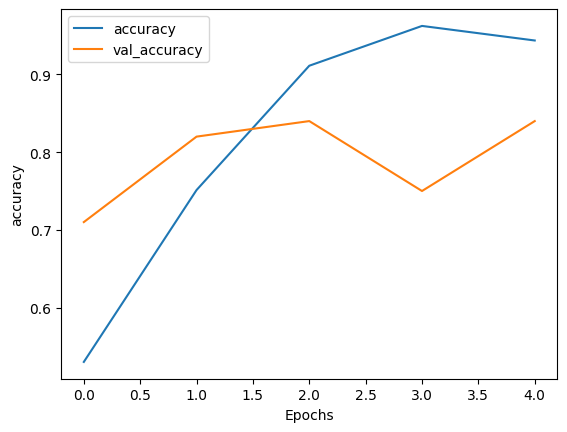

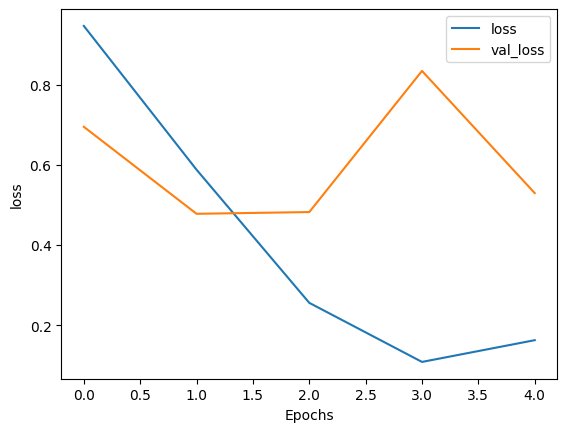

In [49]:
plot_graphs(bert_history, 'accuracy')
plot_graphs(bert_history, 'loss')

In [50]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(5):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, bert_history.history['accuracy'][i],
                                                            bert_history.history['loss'][i],
                                                            bert_history.history['val_accuracy'][i],
                                                            bert_history.history['val_loss'][i]))
     


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.530000 	   0.946429 	   0.710000 	   0.694732
       2   0.751250 	   0.587744 	   0.820000 	   0.477753
       3   0.911250 	   0.255640 	   0.840000 	   0.482086
       4   0.962500 	   0.108244 	   0.750000 	   0.834204
       5   0.943750 	   0.162492 	   0.840000 	   0.529363


In [51]:
bert_model.save_weights('bert-model.h5')

In [52]:
%%time
score = bert_model.evaluate(test_encoded)
print("Test Accuracy:", score[1])

4/4 [==============================] - 7s 2s/step - loss: 0.9342 - accuracy: 0.7600
Test Accuracy: 0.7599999904632568
CPU times: user 25.1 s, sys: 176 ms, total: 25.3 s
Wall time: 10.3 s


In [53]:
predicted_raw = bert_model.predict(test_encoded)

4/4 [==============================] - 12s 2s/step


In [54]:
y_pred = np.argmax(predicted_raw['logits'], axis=1)
y_true = np.array(df_test['label'])

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy_score(y_true, y_pred)

0.76

In [56]:
confusion_matrix(y_true, y_pred)

array([[15,  1,  3],
       [ 5, 44,  1],
       [ 2, 12, 17]])

In [57]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73        19
           1       0.77      0.88      0.82        50
           2       0.81      0.55      0.65        31

    accuracy                           0.76       100
   macro avg       0.75      0.74      0.74       100
weighted avg       0.77      0.76      0.75       100



In [58]:
# Load fine-tuning results
bert_load_model = TFBertForSequenceClassification.from_pretrained(
    'indobenchmark/indobert-base-p2', num_labels=3)
bert_load_model.load_weights('bert-model.h5')

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [59]:
# Sample text
input_text = 'tolong dong diupgrade untuk di tambah riwayat penggunaan listrik harian supaya kita bisa lebih mudah lagi mengontrol penggunaan listrik setiap harinya terimakasih'

# Encode input text
input_text_tokenized = bert_tokenizer.encode(input_text,
                                             truncation=True,
                                             padding='max_length',
                                             return_tensors='tf')

Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [60]:
# Make predictions
bert_predict = bert_load_model(input_text_tokenized)
# Softmax function to get classification results
bert_output = tf.nn.softmax(bert_predict[0], axis=-1)

In [61]:
sentiment_labels = ['netral','negatif', 'positif']
label = tf.argmax(bert_output, axis=1)
label = label.numpy()

In [62]:
print(input_text, ':', sentiment_labels[label[0]])

tolong dong diupgrade untuk di tambah riwayat penggunaan listrik harian supaya kita bisa lebih mudah lagi mengontrol penggunaan listrik setiap harinya terimakasih : negatif


### Confusion Matrix

Text(50.722222222222214, 0.5, 'Label sebenarnya')

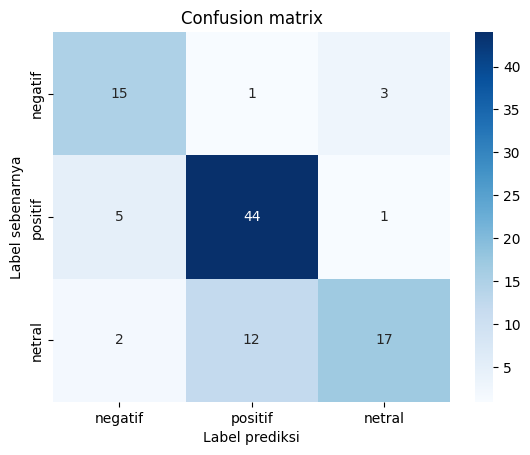

In [63]:
import seaborn as sn
from pandas import DataFrame
confm = confusion_matrix(y_true, y_pred)
columns = ['negatif','positif','netral']
df_cm = DataFrame(confm, index=columns, columns=columns)
ax = sn.heatmap(df_cm, cmap='Blues', annot=True)
ax.set_title('Confusion matrix')
ax.set_xlabel('Label prediksi')
ax.set_ylabel('Label sebenarnya')

## WordCloud

In [64]:
df_GROUPBY_label = data_inset.groupby("label", sort=False)
df_GROUPBY_label.get_group('positif')
datagroup = df_GROUPBY_label[['preprocessing','label']].get_group('positif')
datagroup.to_csv('positif.csv')

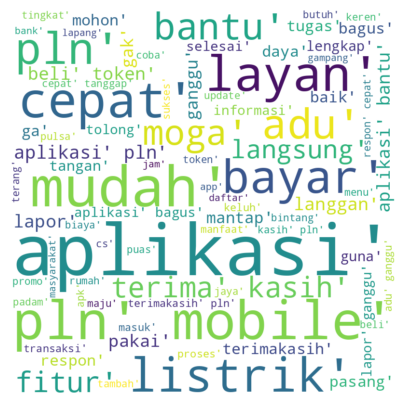

In [65]:
positif = pd.read_csv('positif.csv')
%matplotlib inline

import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
allWords = ' '.join([twts for twts in  positif['preprocessing']])
wordCloud = WordCloud(colormap="viridis",background_color='white',
                       width=800, height=800, random_state=10, max_font_size=200, min_font_size=20).generate(allWords)

plt.figure( figsize=(10,5), facecolor='k', frameon=False)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [66]:
df_GROUPBY_label = data_inset.groupby("label", sort=False)
df_GROUPBY_label.get_group('negatif')
datagroup = df_GROUPBY_label[['preprocessing','label']].get_group('negatif')
datagroup.to_csv('negatif.csv')

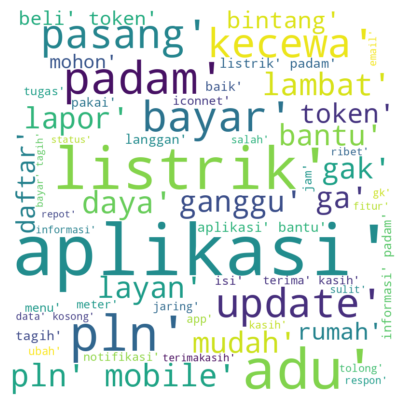

In [67]:
negatif = pd.read_csv('negatif.csv')
%matplotlib inline

import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
allWords = ' '.join([twts for twts in  negatif['preprocessing']])
wordCloud = WordCloud(colormap="viridis", background_color='white',
                       width=800, height=800, random_state=10, max_font_size=200, min_font_size=20).generate(allWords)

plt.figure( figsize=(10,5), facecolor='k', frameon=False)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [68]:
df_GROUPBY_label = data_inset.groupby("label", sort=False)
df_GROUPBY_label.get_group('netral')
datagroup = df_GROUPBY_label[['preprocessing','label']].get_group('netral')
datagroup.to_csv('netral.csv')

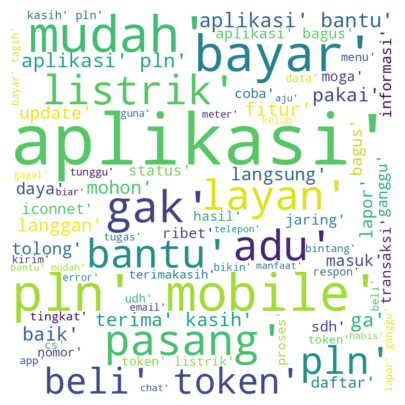

In [69]:
netral = pd.read_csv('netral.csv')
%matplotlib inline

import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
allWords = ' '.join([twts for twts in  netral['preprocessing']])
wordCloud = WordCloud(colormap="viridis", background_color='white',
                       width=800, height=800, random_state=200, max_font_size=200, min_font_size=20).generate(allWords)

plt.figure( figsize=(10,5), facecolor='k', frameon=False)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Selanjutnya kita akan melakukan analisis sentimen ulasan movie menggunakan beberapa lexicon bahasa inggris.

In [70]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('sentiwordnet')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [71]:
import pandas as pd
import numpy as np
import nltk
import textblob
from sklearn.metrics import confusion_matrix, classification_report
np.set_printoptions(precision=2, linewidth=80)

In [72]:
pip install text_normalizer

  Preparing metadata (setup.py) ... done
  Created wheel for text_normalizer: filename=text_normalizer-0.1.3-cp310-cp310-linux_x86_64.whl size=81859 sha256=b6878b2192354807a62c235a947f2dcb3c5718d7c76605141ebbe18ea1f47e98
  Stored in directory: /root/.cache/pip/wheels/fa/9f/80/4a4e7d2d6f6fc35b19993353c2c8f1f7ac48ac29c826d2e676
Successfully built text_normalizer
Note: you may need to restart the kernel to use updated packages.


In [73]:
import text_normalizer as tn

In [74]:
dataset = pd.read_csv('/kaggle/input/movie-review/movie_reviews.csv.bz2', compression='bz2')
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [75]:
# extract data for model evaluation
reviews = np.array(dataset['review'])
sentiments = np.array(dataset['sentiment'])
test_reviews = reviews[35000:]
test_sentiments = sentiments[35000:]
sample_review_ids = [7626, 3533, 13010]

## Textblob Lexicon

In [76]:
for review, sentiment in zip(test_reviews[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    print('Predicted Sentiment polarity:', textblob.TextBlob(review).sentiment.polarity)
    print('-'*60)

REVIEW: no comment - stupid movie, acting average or worse... screenplay - no sense at all... SKIP IT!
Actual Sentiment: negative
Predicted Sentiment polarity: -0.3625
------------------------------------------------------------
REVIEW: I don't care if some people voted this movie to be bad. If you want the Truth this is a Very Good Movie! It has every thing a movie should have. You really should Get this one.
Actual Sentiment: positive
Predicted Sentiment polarity: 0.16666666666666674
------------------------------------------------------------
REVIEW: Worst horror film ever but funniest film ever rolled in one you have got to see this film it is so cheap it is unbeliaveble but you have to see it really!!!! P.s watch the carrot
Actual Sentiment: positive
Predicted Sentiment polarity: -0.037239583333333326
------------------------------------------------------------


In [77]:
# Predict sentiment for test dataset
sentiment_polarity = [textblob.TextBlob(review).sentiment.polarity for review in test_reviews]

In [78]:
predicted_sentiments = ['positive' if score >= 0.1 else 'negative' for score in sentiment_polarity]

In [79]:
labels = ['negative', 'positive']
print(classification_report(test_sentiments, predicted_sentiments))
pd.DataFrame(confusion_matrix(test_sentiments, predicted_sentiments), index=labels, columns=labels)

              precision    recall  f1-score   support

    negative       0.77      0.76      0.76      7490
    positive       0.76      0.78      0.77      7510

    accuracy                           0.77     15000
   macro avg       0.77      0.77      0.77     15000
weighted avg       0.77      0.77      0.77     15000



,negative,positive
negative,5668,1822
positive,1675,5835


In [80]:
Text = test_reviews[sample_review_ids]
Real_sentiments = test_sentiments[sample_review_ids]
TextBlob_sentiment_polarity = sentiment_polarity[7626], sentiment_polarity[3533],sentiment_polarity[13010]
TextBlob_predicted_sentiments = predicted_sentiments[7626],predicted_sentiments[3533],predicted_sentiments[13010]

In [81]:
TextBlob_sample_report = {'Text':Text,'Real_sentiments':Real_sentiments,'TextBlob_sentiment_polarity':TextBlob_sentiment_polarity,
                          'TextBlob_predicted_sentiments':TextBlob_predicted_sentiments}
TextBlob_sample_report = pd.DataFrame(data=TextBlob_sample_report)

In [82]:
TextBlob_sample_report

,Text,Real_sentiments,TextBlob_sentiment_polarity,TextBlob_predicted_sentiments
0,"no comment - stupid movie, acting average or w...",negative,-0.362500,negative
1,I don't care if some people voted this movie t...,positive,0.166667,positive
2,Worst horror film ever but funniest film ever ...,positive,-0.037240,negative


In [83]:
def color_negative_red(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value == 'positive':
    color = 'green'
  else:
    color = 'red'

  return 'color: %s' % color

In [84]:
df = TextBlob_sample_report.copy()

In [85]:
df.style.applymap(color_negative_red, subset=['Real_sentiments','TextBlob_predicted_sentiments'])

,Text,Real_sentiments,TextBlob_sentiment_polarity,TextBlob_predicted_sentiments
0,"no comment - stupid movie, acting average or worse... screenplay - no sense at all... SKIP IT!",negative,-0.362500,negative
1,I don't care if some people voted this movie to be bad. If you want the Truth this is a Very Good Movie! It has every thing a movie should have. You really should Get this one.,positive,0.166667,positive
2,Worst horror film ever but funniest film ever rolled in one you have got to see this film it is so cheap it is unbeliaveble but you have to see it really!!!! P.s watch the carrot,positive,-0.037240,negative


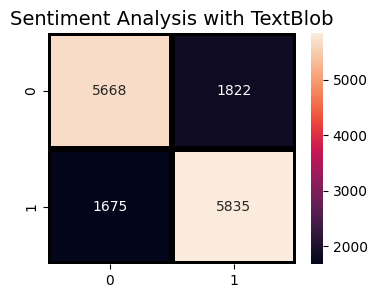

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(test_sentiments, predicted_sentiments),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Sentiment Analysis with TextBlob",fontsize=14)
plt.show()


In [87]:
from sklearn.metrics import accuracy_score
TextBlob_model = accuracy_score(test_sentiments, predicted_sentiments)
print(TextBlob_model)

0.7668666666666667
